In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [147]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [148]:
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [149]:
team_1 = 'Delhi Capitals'
team_2 = 'Chennai Super Kings'

In [150]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

# Winning Probability of Teams

Text(0.5, 1.0, 'Percentage of Winning')

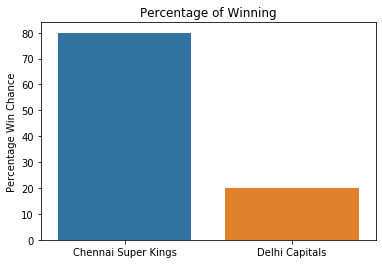

In [151]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [152]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# Runs scored by CSK today

#### Against DC

In [153]:
csk_vs_dc = delivery[(delivery['batting_team']==team_2) & (delivery['bowling_team']==team_1)]
csk_vs_dc_describe = csk_vs_dc.groupby('match_id').sum()['total_runs'].describe()
print("Since, the probability of runs scored in Sharjah to be high, we take score value between median and 75% quartile value.")
print("Predicted Score by CSK will be around {} or more. ".format((csk_vs_dc_describe[5] + csk_vs_dc_describe[6])/2))

Since, the probability of runs scored in Sharjah to be high, we take score value between median and 75% quartile value.
Predicted Score by CSK will be around 174.0 or more. 


#### Against all teams

In [154]:
csk_batting = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()
csk_runs_describe = csk_batting[csk_batting['total_runs']>100]['total_runs'].describe()
print("Since, the probability of runs scored in Sharjay to be high, we take score value between median and 75% quartile value.")
print("Predicted Score by CSK will be around {} or more. ".format((csk_runs_describe[5] + csk_runs_describe[6])/2))

Since, the probability of runs scored in Sharjay to be high, we take score value between median and 75% quartile value.
Predicted Score by CSK will be around 179.0 or more. 


# Wickets took by CSK between 15 to 20 overs

In [155]:
csk_dc_death_overs = delivery[(delivery['bowling_team'] == team_2) & (delivery['batting_team']==team_1) & (delivery['over']>=15)].groupby('match_id').sum()
print("Predicted wickets fall of DC by CSK between 15 to 20 overs is: {}".format(round(csk_dc_death_overs['player_dismissed'].mean())))

Predicted wickets fall of DC by CSK between 15 to 20 overs is: 2


# No. of balls for CSK to score 100 runs

In [156]:
csk_batting_100 = delivery[(delivery['batting_team']==team_2)]
match_id = list()
no_of_balls = list()
for mat_id in csk_batting_100['match_id'].unique():
    runs = 0
    balls = 0
    for run in csk_batting_100[csk_batting_100['match_id']==mat_id]['total_runs']:
        balls+=1
        runs+=run
        if runs in range(100, 106):
            break
    if runs>= 100 and balls<=115:
        match_id.append(mat_id)
        no_of_balls.append(balls)
            

Therefore, the predicted balls to hit a team century is more than 70


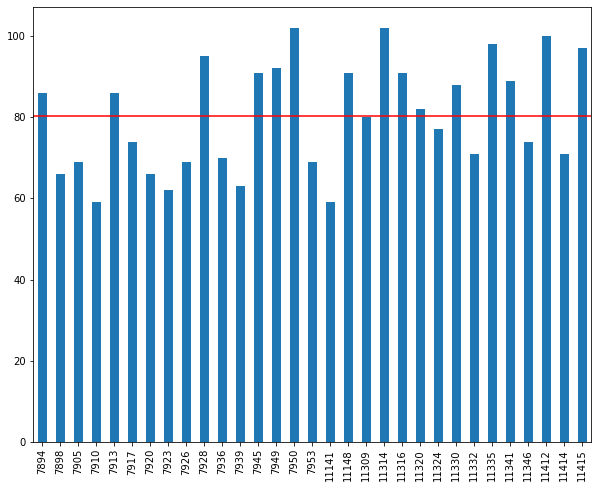

In [157]:
csk_century = pd.DataFrame(index=match_id, data=no_of_balls, columns=['No_of_Balls_for_100'])
plt.figure(figsize=(10,8))
csk_century['No_of_Balls_for_100'].plot(kind='bar')
plt.axhline(y=(csk_century['No_of_Balls_for_100'].mean()), color='red')
print("Therefore, the predicted balls to hit a team century is more than 70")

# No. of no-balls

In [158]:
bowler_squad = ["AR Patel", "MP Stoinis" , 'HV Patel', "K Rabada", "R Ashwin" ,"SN Thakur", "DL Chahar", "KV Sharma", "DJ Bravo", "RA Jadeja", "S Curran", "SR Watson", "PP Chawla"]

In [159]:
bowlers_noball = dict()
for bowler in bowler_squad:
    no_of_no_balls_per_match = (delivery[delivery['bowler']==bowler].groupby('match_id').sum()['noball_runs']).mean()
    bowlers_noball[bowler] = no_of_no_balls_per_match

print("Number of No-balls predicted :", round(sum(bowlers_noball.values())))

Number of No-balls predicted : 1


# Summary

- Data was cleaned and filtered. The data from the year 2016 to 2019 was taken and all the non-required columns were dropped. Using the "winner" column of the dataset, the percentage chances of winning was calculated. 
- Since the probability of runs scored in Sharjah is to be high, we take the average score value between median and 75% quartile values of runs scores by CSK per match during 2016-2019.
- The number of wickets took by CSK of DC during last 5 overs was taken and averaged to estimate.
- The number of balls CSK team took to hit team century per match was calculated and then averaged to estimate the range of the number of balls CSK will take today to hit team century. 
- The predicted bowlers playing in today match was considered and their mean no. of no-balls per match was considered and summed to find out the number of no-balls will be bowled today.